Author: Raihan Kemmy Rachmansyah


# Import Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date


# Load Dataset


In [2]:
data = pd.read_csv('loan_customer.csv')
data.sample(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
215,LP001716,1985-09-25,6.287748e+11,Male,Yes,0,Graduate,No,3173.0,3021.0,137000,360,30,1.0,NaN,house,APPROVE
356,LP002142,1991-08-22,6.287746e+11,Female,Yes,0,Graduate,Yes,5500.0,0.0,105000,360,30,0.0,NaN,studio,REJECT
69,LP001241,1978-01-31,6.285741e+11,Female,No,0,Graduate,No,4300.0,0.0,136000,360,30,0.0,NaN,apartment,REJECT
594,LP002926,1979-06-10,NaN,Male,Yes,2,Graduate,Yes,2726.0,0.0,106000,360,30,0.0,NaN,apartment,REJECT
196,LP001665,1978-06-08,6.281387e+10,Male,Yes,1,Graduate,No,3125.0,2583.0,170000,360,30,1.0,NaN,apartment,REJECT


# Data Cleansing


## Handling missing values


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [4]:
data.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [5]:
kolom = data.columns[data.isnull().sum() > 0]
data[kolom].select_dtypes(include='object').describe()

,birth_date,gender,married,dependents,education,self_employed,has_credit_card,property_type
count,572,608,618,605,620,588,88,620
unique,541,2,2,4,2,2,2,3
top,1987-10-18,Male,Yes,0,Graduate,No,no,apartment
freq,2,495,403,349,485,506,52,235


In [6]:
data[kolom].select_dtypes(exclude='object').describe()

,phone_number,applicant_income,credit_history
count,5.690000e+02,612.000000,570.000000
mean,5.468552e+11,5681.549020,0.842105
std,1.987860e+11,9056.454103,0.364963
min,6.281101e+10,150.000000,0.000000
25%,6.281140e+11,2874.500000,1.000000
50%,6.281343e+11,3812.500000,1.000000
75%,6.285665e+11,5815.750000,1.000000
max,6.287799e+11,170578.000000,1.000000


In [7]:
print(f'Total Data {data.shape[0]}')
print(f'5% Dari Total Data {(data.shape[0]*10)/100}')

Total Data 621
5% Dari Total Data 62.1


In [8]:
data.columns[data.isnull().sum() > 40]

Index(['birth_date', 'phone_number', 'credit_history', 'has_credit_card'], dtype='object')

<b>Mengisi Data</b> pada kolom yang memiliki jumlah missing value lebih dari 10% dari total data<br>
<b>Membuang Data</b> pada kolom yang memiliki jumlah missing value kurang dari 10% dari total data


In [9]:
data[['has_credit_card', 'birth_date', 'phone_number']] = data[['has_credit_card', 'birth_date', 'phone_number']].fillna('Unknown')
data['credit_history'].fillna(0.0, inplace=True)
data.dropna(inplace=True)

data.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

In [10]:
print(f'Total Data Setelah Handling Missing Value {data.shape[0]} Data')

Total Data Setelah Handling Missing Value 552 Data


## Handling duplicated data


In [11]:
data['loan_id'].duplicated().sum()

5

In [12]:
data[data['loan_id'].duplicated(keep=False)].sort_values(by=['loan_id', 'has_credit_card'])

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
89,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,Unknown,apartment,APPROVE
90,LP001310,1987-10-18,628131021360.0,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
278,LP001904,1986-01-30,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,Unknown,house,APPROVE
279,LP001904,1986-01-30,62811520563.0,Male,Yes,0,Graduate,No,3103.0,1300.0,80000,360,30,1.0,Unknown,house,APPROVE
307,LP001990,1980-08-03,628527921833.0,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,Unknown,house,REJECT
308,LP001990,1980-08-03,628527921833.0,Male,No,0,Not Graduate,No,2000.0,0.0,119000,360,30,1.0,yes,house,REJECT
363,LP002160,1990-11-27,628115255742.0,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,Unknown,apartment,APPROVE
362,LP002160,1990-11-27,628115255742.0,Male,Yes,3+,Graduate,No,5167.0,3167.0,200000,360,30,1.0,yes,apartment,APPROVE
401,LP002277,1972-06-12,628138392877.0,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,Unknown,house,REJECT
400,LP002277,1972-06-12,628138392877.0,Female,No,0,Graduate,No,3180.0,0.0,71000,360,30,0.0,yes,house,REJECT


In [13]:
filter = data[data['loan_id'].duplicated(keep=False)].sort_values(by=['loan_id', 'has_credit_card'])
data_filtered = filter.drop_duplicates(subset=['loan_id'], keep='first')

data.drop(index=data_filtered.index, inplace=True)
print(f'Total Data Setelah Handling Duplicated Data {data.shape[0]} Data')

Total Data Setelah Handling Duplicated Data 547 Data


In [14]:
data['loan_id'].duplicated(keep=False).sum()

0

## Handling Outlier


In [15]:
numerik = data.select_dtypes(exclude='object').columns
kategorik = data.select_dtypes(include='object').columns

print(f'Kolom Numerik\n{numerik}\n\n')
print(f'Kolom Kategorik\n{kategorik}')

Kolom Numerik
Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_term_month', 'loan_term_year', 'credit_history'],
      dtype='object')


Kolom Kategorik
Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'has_credit_card',
       'property_type', 'loan_status'],
      dtype='object')


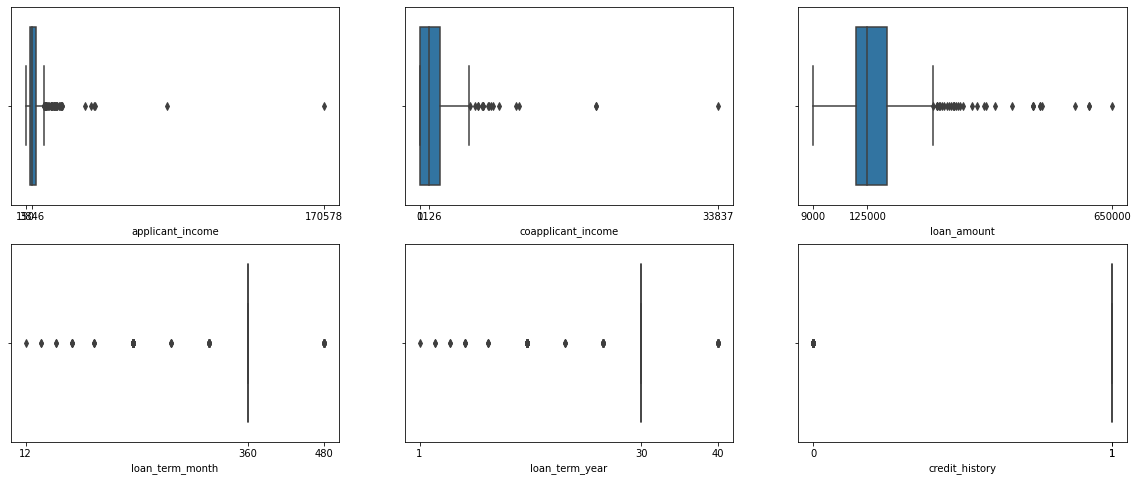

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

c = 0
for a in range(0, 2):
    for b in range(0, 3):
        if c < len(numerik):
            sns.boxplot(x=data[numerik[c]], data=data, orient='h', ax=axes[a, b])
            axes[a, b].set_xticks([data[numerik[c]].min(), data[numerik[c]].median(), data[numerik[c]].max()])
            c += 1
        else:
            # Menghapus subplot yang tidak digunakan
            fig.delaxes(axes[a, b])

<b>Menghapus Outliers


In [17]:
numerik = data.select_dtypes(exclude='object').drop(columns=['credit_history', 'loan_term_month', 'loan_term_year']).columns
numerik

Index(['applicant_income', 'coapplicant_income', 'loan_amount'], dtype='object')

In [18]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = data[numerik].quantile(0.25)
Q3 = data[numerik].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Mendeteksi outliers
outliers = ((data[numerik] < lower_bound) | (data[numerik] > upper_bound))

# Menghapus data outliers
data = data[~outliers.any(axis=1)]

print(f'Total Data Setelah Handling Missing Value {data.shape[0]} Data')

Total Data Setelah Handling Missing Value 476 Data


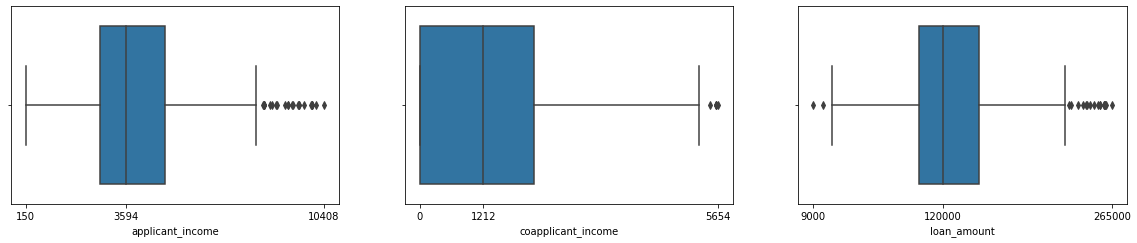

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

c = 0
for a in range(0, 2):
    for b in range(0, 3):
        if c < len(numerik):
            sns.boxplot(x=data[numerik[c]], data=data, orient='h', ax=axes[a, b])
            axes[a, b].set_xticks([data[numerik[c]].min(), data[numerik[c]].median(), data[numerik[c]].max()])
            c += 1
        else:
            # Menghapus subplot yang tidak digunakan
            fig.delaxes(axes[a, b])

Data menjadi lebih bersih dari Outliers


## Feature Encoding


In [20]:
numerik = data.select_dtypes(exclude='object').columns
kategorik = data.select_dtypes(include='object').drop(columns=['phone_number', 'loan_id']).columns

print(f'Kolom Numerik\n{numerik}\n\n')
print(f'Kolom Kategorik\n{kategorik}')

Kolom Numerik
Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_term_month', 'loan_term_year', 'credit_history'],
      dtype='object')


Kolom Kategorik
Index(['birth_date', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'has_credit_card', 'property_type', 'loan_status'],
      dtype='object')


In [21]:
data[kategorik].nunique()

birth_date         425
gender               2
married              2
dependents           4
education            2
self_employed        2
has_credit_card      3
property_type        3
loan_status          2
dtype: int64

In [22]:
data[kategorik].describe()

,birth_date,gender,married,dependents,education,self_employed,has_credit_card,property_type,loan_status
count,476,476,476,476,476,476,476,476,476
unique,425,2,2,4,2,2,3,3,2
top,Unknown,Male,Yes,0,Graduate,No,Unknown,apartment,APPROVE
freq,37,386,310,279,356,420,407,185,334


Melakukan <b>Get Dummies</b> untuk Kolom dengan jumlah data unik < 4 <br>
Melakukan <b>Mapping dengan fungsi Map()</b> untuk Kolom dengan jumlah Data Unik >= 4


In [23]:
kolom_onehot = data[kategorik].columns[data[kategorik].nunique() < 4]
kolom_label = data[kategorik].columns[data[kategorik].nunique() >= 4]

print(f'Kolom One-Hot\n{kolom_onehot}\n\n')
print(f'Kolom Label\n{kolom_label}')

Kolom One-Hot
Index(['gender', 'married', 'education', 'self_employed', 'has_credit_card',
       'property_type', 'loan_status'],
      dtype='object')


Kolom Label
Index(['birth_date', 'dependents'], dtype='object')


<b>Duplikat Dataframe 'data'


In [24]:
data_encode = data.copy

In [25]:
data_encode = pd.get_dummies(data, columns=kolom_onehot, dtype=int)
data_encode.sample(5)

,loan_id,birth_date,phone_number,dependents,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,...,self_employed_No,self_employed_Yes,has_credit_card_Unknown,has_credit_card_no,has_credit_card_yes,property_type_apartment,property_type_house,property_type_studio,loan_status_APPROVE,loan_status_REJECT
348,LP002129,1981-05-10,628116140712.0,0,2499.0,2458.0,160000,360,30,1.0,...,1,0,1,0,0,1,0,0,1,0
7,LP001014,1999-05-21,628567566695.0,3+,3036.0,2504.0,158000,360,30,0.0,...,1,0,1,0,0,1,0,0,0,1
41,LP001120,1978-02-07,628111748544.0,0,1800.0,1213.0,47000,360,30,1.0,...,1,0,1,0,0,0,1,0,1,0
542,LP002738,1980-08-07,62857050185.0,2,3617.0,0.0,107000,360,30,1.0,...,1,0,1,0,0,1,0,0,1,0
387,LP002234,1978-02-25,62811372926.0,0,7167.0,0.0,128000,360,30,1.0,...,0,1,1,0,0,0,1,0,1,0


In [26]:
data['dependents'].value_counts()

0     279
2      82
1      76
3+     39
Name: dependents, dtype: int64

In [27]:
kategori_dependents = sorted(data['dependents'].unique())

# Membuat dictionary mapping
mapping = {kategori_dependents[i]: i+1 for i in range(len(kategori_dependents))}

# Melakukan mapping data menggunakan fungsi map()
data_encode['dependents'] = data['dependents'].map(mapping)

data_encode['dependents'].value_counts()

1    279
3     82
2     76
4     39
Name: dependents, dtype: int64

# Business Insight


In [28]:
data.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,628114203187.0,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,Unknown,house,APPROVE
1,LP001003,1979-08-24,628776449212.0,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,Unknown,studio,REJECT
2,LP001005,1991-03-28,628119240537.0,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,Unknown,house,APPROVE
3,LP001006,1980-06-02,62856343702.0,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,Unknown,house,APPROVE
4,LP001008,1989-05-19,628113008687.0,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,Unknown,house,APPROVE


## Analisis minat pelanggan berdasarkan pada tipe properti


#### <b>Berdasarkan Gender


In [29]:
data.groupby(['property_type', 'gender']).size().unstack()

gender,Female,Male
property_type,,
apartment,42,143
house,25,124
studio,23,119


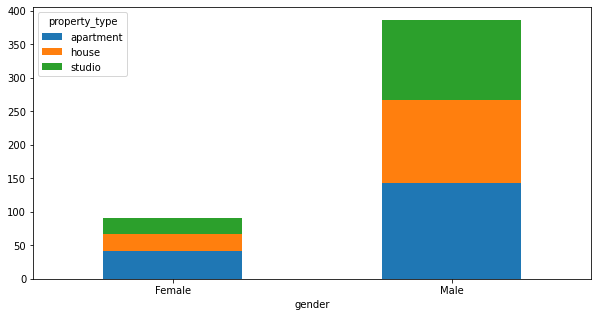

In [30]:
data.groupby(['gender','property_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.xticks(rotation=0);

Berdasarkan Hasil analisis tersebut, didapatkan bahwa : <br>
Peminjam Kredit di dominasi oleh <b>Laki-Laki</b> dan<br>
Tipe Properti dari Laki-Laki dan Perempuan lebih banyak menggunakan <b>Apartment</b>


In [31]:
data.groupby(['property_type', 'gender'])['loan_amount'].sum().unstack()

gender,Female,Male
property_type,,
apartment,4773000,19441000
house,2583000,14544000
studio,2794000,15779000


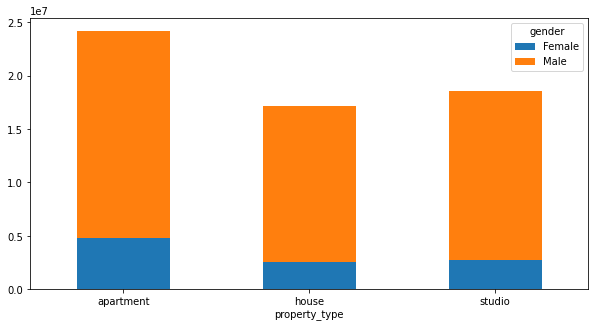

In [32]:
data.groupby(['property_type', 'gender'])['loan_amount'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.xticks(rotation=0);

Berdasarkan Hasil analisis tersebut, didapatkan bahwa : <br><br>
Peminjam Kredit di dominasi oleh <b>Laki-Laki</b> dan<br>
Peminjam Kredit di dominasi oleh Properti <b>Apartment</b> yang mencapai total kredit:

- Laki-Laki = 19441000
- Perempuan = 4773000


#### <b>Berdasarkan Total Property


In [33]:
pd.DataFrame(data.groupby(['property_type']).size(), columns=['Jumlah Data'])

,Jumlah Data
property_type,
apartment,185
house,149
studio,142


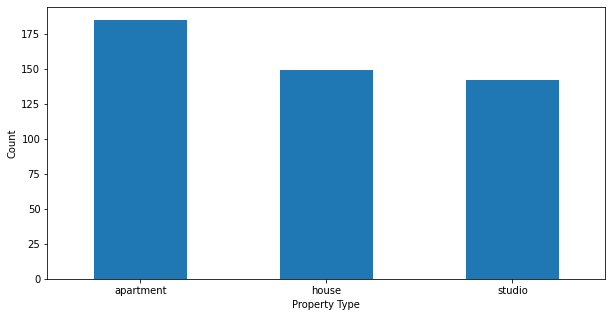

In [34]:
data.groupby(['property_type']).size().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=0);

plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show();

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam


#### <b>Dalam Bulan


In [35]:
data.groupby(['married', 'loan_term_month']).size().unstack().fillna(0.0).astype(int)

loan_term_month,12,36,60,84,120,180,240,300,360,480
married,,,,,,,,,,
No,0,2,0,0,1,5,1,3,147,7
Yes,1,0,1,4,2,27,2,7,261,5


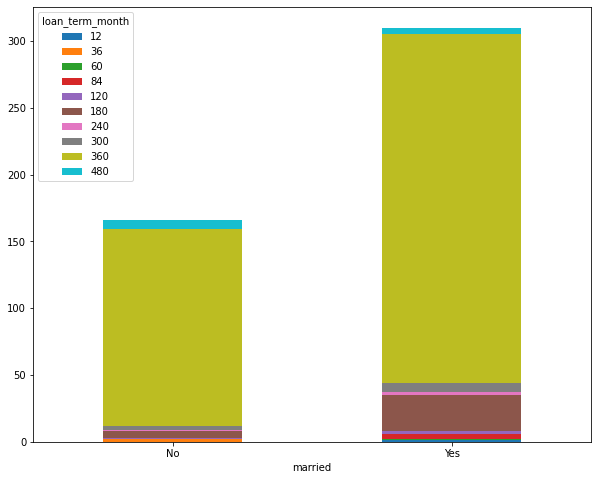

In [36]:
data.groupby(['married', 'loan_term_month']).size().unstack().fillna(0.0).astype(int).plot(kind='bar', stacked=True, figsize=(10,8))
plt.xticks(rotation=0);

#### <b>Dalam Tahun


In [37]:
data.groupby(['married', 'loan_term_year']).size().unstack().fillna(0.0).astype(int)

loan_term_year,1,3,5,7,10,15,20,25,30,40
married,,,,,,,,,,
No,0,2,0,0,1,5,1,3,147,7
Yes,1,0,1,4,2,27,2,7,261,5


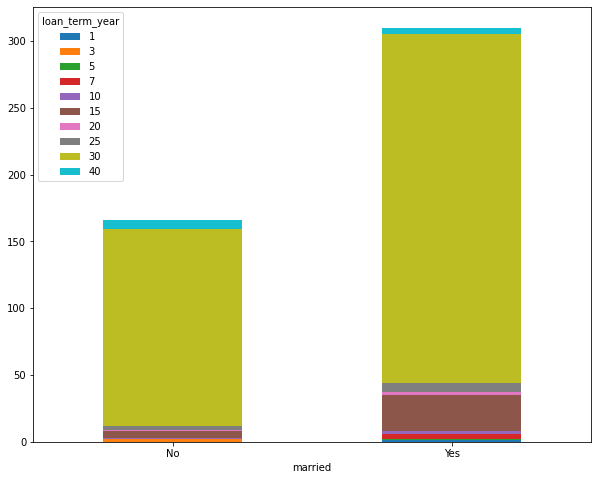

In [38]:
data.groupby(['married', 'loan_term_year']).size().unstack().fillna(0.0).astype(int).plot(kind='bar', stacked=True, figsize=(10,8))
plt.xticks(rotation=0);

Berdasarkan Hasil analisis tersebut, didapatkan bahwa : <br>
Peminjam Kredit di dominasi oleh <b>Pasangan yang Sudah Menikah</b> dan<br>
Paling banyak mengajukan Kredit selama <b>30 Tahun atau 360 Bulan</b>


# Kesimpulan


- Gender Laki-Laki Lebih banyak melakukan Pinjaman Kredit daripada Perempuan
- Kebanyakan orang yang melakukan Pinjaman Kredit sudah menikah
- Kebanyakan orang memilih waktu peminjaman selama 30 Tahun
- Property yang dilakukan peminjaman kebanyakan adalah Apartment


# Insight Lainnya


## Analisis Rata-Rata Usia Peminjam Kredit


In [39]:
data['birth_date'] = pd.to_datetime(data['birth_date'], errors='coerce')
data['umur'] = date.today().year - data['birth_date'].dt.year

In [40]:
data.groupby(['umur', 'gender']).size().unstack().fillna(0.0)

gender,Female,Male
umur,,
23.0,0.0,1.0
24.0,0.0,2.0
26.0,0.0,1.0
27.0,1.0,1.0
28.0,0.0,5.0
29.0,2.0,5.0
30.0,0.0,6.0
31.0,2.0,6.0
32.0,8.0,18.0


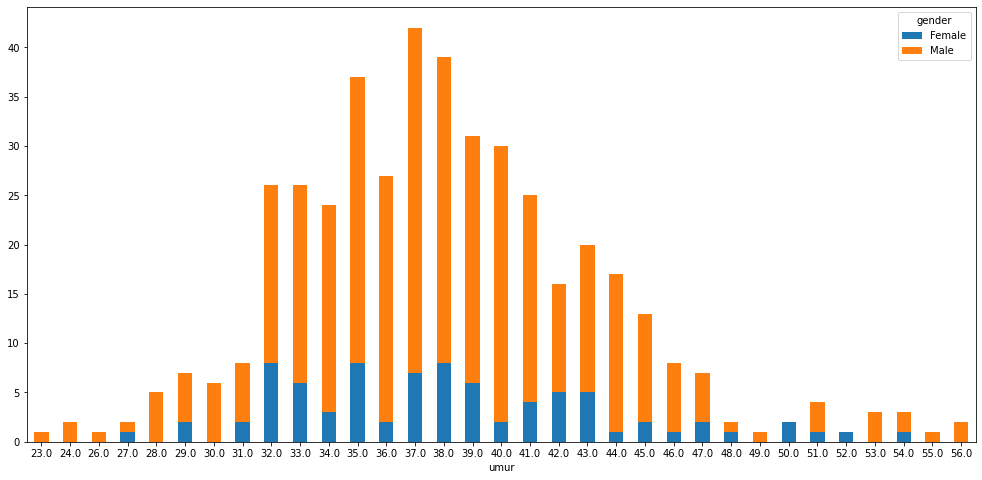

In [41]:
data.groupby(['umur', 'gender']).size().unstack().fillna(0.0).plot(kind='bar', stacked=True, figsize=(17,8))
plt.xticks(rotation=0);

<b>Rata-Rata Umur


In [42]:
pd.DataFrame(data.groupby('gender')['umur'].mean().fillna(0.0))

,umur
gender,
Female,38.271605
Male,38.033520


Rata-rata berumur 38 tahun untuk Laki-Laki maupun Perempuan


## Analisis Tingkat Pendidikan Berdasarkan Gender dan Status Pernikahan Peminjam Kredit


In [43]:
data.groupby(['gender', 'education', 'married']).size().unstack()

married              No  Yes
gender education            
Female Graduate      54   20
       Not Graduate  11    5
Male   Graduate      72  210
       Not Graduate  29   75

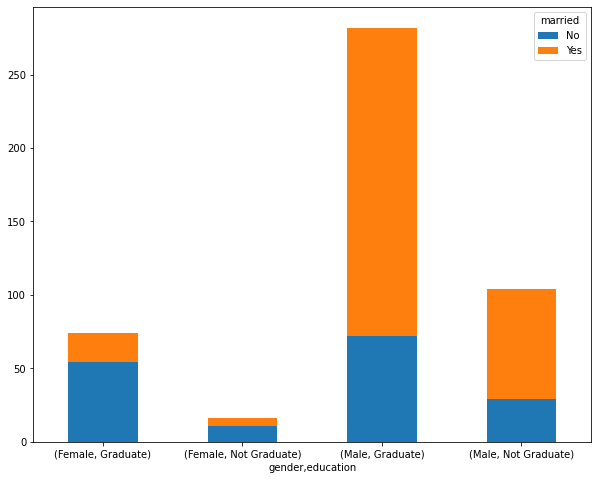

In [44]:
data.groupby(['gender', 'education', 'married']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.xticks(rotation=0);